<a href="https://colab.research.google.com/github/smddkt/NLP_Project/blob/main/r_inosmnia_%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D%2C_%EC%9B%8C%EB%93%9C_%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 레딧에서 텍스트 크롤링하기



Source:

https://www.youtube.com/watch?v=wgveWxLywto:


https://medium.com/@kiddojazz/reddit-sentiment-analysis-f8a1a790124a

In [30]:
!pip install asyncpraw
import praw

In [33]:
reddit = praw.Reddit(
    client_id="1Ormw07Wq5ocsSrt08ClpQ",
    client_secret="pj6TKTwwuaE76KRceUgqo5PZ6G9GAw",
    user_agent="sangeun",
    check_for_async=False #비동기 방식 사용 안함
)

import pandas as pd
import numpy as np
import re #RegEx : Regular expression

In [27]:
print(reddit.read_only)

True


##Trending Topics

In [34]:
headlines=set()
for submission in reddit.subreddit('insomnia').hot(limit=None):
  print(submission.title)#Subreddit Title
  print(submission.id) #ID
  print(submission.author) #Author of the subreddit
  print(submission.created_utc) #Date and time being created
  print(submission.score) # Average Score
  print(submission.upvote_ratio) # Upvote ratio
  print(submission.url) # Like to the Subreddit
  break

Comprehensive list of insomnia medications and treatments
wqenw9
None
1660708065.0
408
1.0
https://www.reddit.com/r/insomnia/comments/wqenw9/comprehensive_list_of_insomnia_medications_and/


In [35]:
headlines.add(submission.title)
print(len(headlines))

1


## Get total comments in Subreddit

In [87]:
subs = reddit.subreddit('insomnia').top(time_filter="all", limit = None)

In [88]:
headlines = set()
for submission in subs:
 headlines.add(submission.title)
print(len(headlines))

992


In [105]:
#Create a dataframe from the scrapped data
insomnia_df = pd.DataFrame(headlines)
insomnia_df.columns = ['Titles']
insomnia_df.head()

,Titles
0,Did no one tell teachers insomnia exists?
1,Does anyone feel that once they get over tired...
2,Why sleep when you could just lay in the dark ...
3,Can't sleep because I'm too busy worrying abou...
4,No you don’t have fatal sleep insomnia.


In [108]:
insomnia_df.Titles.duplicated().sum()  #중복 없는 거 확인

0

## Remove Unicode and Hyperlinks
These are unwanted texts, characters, and links, with the removal of these, will help improve our prediction model. The code below uses a regex pattern to quickly remove unwanted characters.

In [109]:
#데이터 클리닝 - 필요 없는 문장부호 등 지우기 (트위터용 소스코드)

#Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub(r'@[A-Za-z0–9]+',' ', text) #Remove @mentions replace with blank
 text = re.sub(r'#', ' ', text) #Remove the '#' symbol, replace with blank
 text = re.sub(r'RT[\s]+', ' ', text) #Removing RT, replace with blank
 text = re.sub(r'https?:\/\/\S+', ' ', text) #Remove the hyperlinks
 text = re.sub(r':', ' ', text) # Remove ':'
 return text

insomnia_df['Titles']= insomnia_df['Titles'].apply(cleanTxt)

#Show the clean text
insomnia_df.head()

,Titles
0,Did no one tell teachers insomnia exists?
1,Does anyone feel that once they get over tired...
2,Why sleep when you could just lay in the dark ...
3,Can't sleep because I'm too busy worrying abou...
4,No you don’t have fatal sleep insomnia.


In [110]:
#데이터 클리닝 - 이모티콘, 유니코드 지우기

#Next we have to remove emoji & Unicode from the Tweet data.
def remove_emoji(string):
 emoji_pattern = re.compile("["
 u"\U0001F600-\U0001F64F" # emoticons
 u"\U0001F300-\U0001F5FF" # symbols & pictographs
 u"\U0001F680-\U0001F6FF" # transport & map symbols
 u"\U0001F1E0-\U0001F1FF" # flags (iOS)
 u"\U00002500-\U00002BEF" # chinese char
 u"\U00002702-\U000027B0"
 u"\U00002702-\U000027B0"
 u"\U000024C2-\U0001F251"
 u"\U0001f926-\U0001f937"
 u"\U00010000-\U0010ffff"
 u"\u2640-\u2642"
 u"\u2600-\u2B55"
 u"\u200d"
 u"\u23cf"
 u"\u23e9"
 u"\u231a"
 u"\ufe0f" # dingbats
 u"\u3030"
 "]+", flags=re.UNICODE)
 return emoji_pattern.sub('', string)
#Cleaning the text
insomnia_df["Titles"]= insomnia_df["Titles"].apply(remove_emoji)
#Show the clean text
insomnia_df.head()

,Titles
0,Did no one tell teachers insomnia exists?
1,Does anyone feel that once they get over tired...
2,Why sleep when you could just lay in the dark ...
3,Can't sleep because I'm too busy worrying abou...
4,No you don’t have fatal sleep insomnia.


## 감성분석: Get Subjectivity and Polarity of Title



Polarity: 텍스트 감정이 긍정-부정-중립 중 무엇인지

Subjectivity: 텍스트의 객관성과 반대되는 개인의 주관적인 견해나 감정의 정도를 나타내는 특성

In [112]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [115]:
#Create a function to get the subjectivity
def getSubjectivity(text):
 return TextBlob(text).sentiment.subjectivity
#Create a function to get Polarity
def getPolarity(text):
 return TextBlob(text).sentiment.polarity
#Now we create a new column for what we just did and add it to the Tweet_df dataframe
insomnia_df['Subjectivity'] = insomnia_df['Titles'].apply(getSubjectivity)
insomnia_df['Polarity'] = insomnia_df['Titles'].apply(getPolarity)
#Now display data
insomnia_df.head()

,Titles,Subjectivity,Polarity
0,Did no one tell teachers insomnia exists?,0.000000,0.000000
1,Does anyone feel that once they get over tired...,0.733333,-0.133333
2,Why sleep when you could just lay in the dark ...,0.400000,-0.150000
3,Can't sleep because I'm too busy worrying abou...,0.300000,0.100000
4,No you don’t have fatal sleep insomnia.,0.000000,0.000000


In [116]:
#Group the range of Polarity into different categories
# polarity가 음수이면 부정, 0이면 중립, 양수이면 긍정으로 표시하는 "insight"열을 추가함.
def getInsight(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

insomnia_df['Insight'] = insomnia_df['Polarity'].apply(getInsight)
insomnia_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Did no one tell teachers insomnia exists?,0.000000,0.000000,Neutral
1,Does anyone feel that once they get over tired...,0.733333,-0.133333,Negative
2,Why sleep when you could just lay in the dark ...,0.400000,-0.150000,Negative
3,Can't sleep because I'm too busy worrying abou...,0.300000,0.100000,Positive
4,No you don’t have fatal sleep insomnia.,0.000000,0.000000,Neutral
5,Do you fall asleep when taking naps?,0.000000,0.000000,Neutral
6,Here's how I improved my insomnia,0.000000,0.000000,Neutral
7,I figured out my insomnia and am dipping out o...,0.000000,0.000000,Neutral
8,Only 1 sleep until Christmas!,1.000000,0.000000,Neutral
9,"Tough to fall asleep, but once you fall asleep...",0.676667,-0.226944,Negative


## 긍정-중립-부정 점수 그래프

In [119]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') #Matplotlib 그래프의 스타일을 'FiveThirtyEight' 스타일로 설정

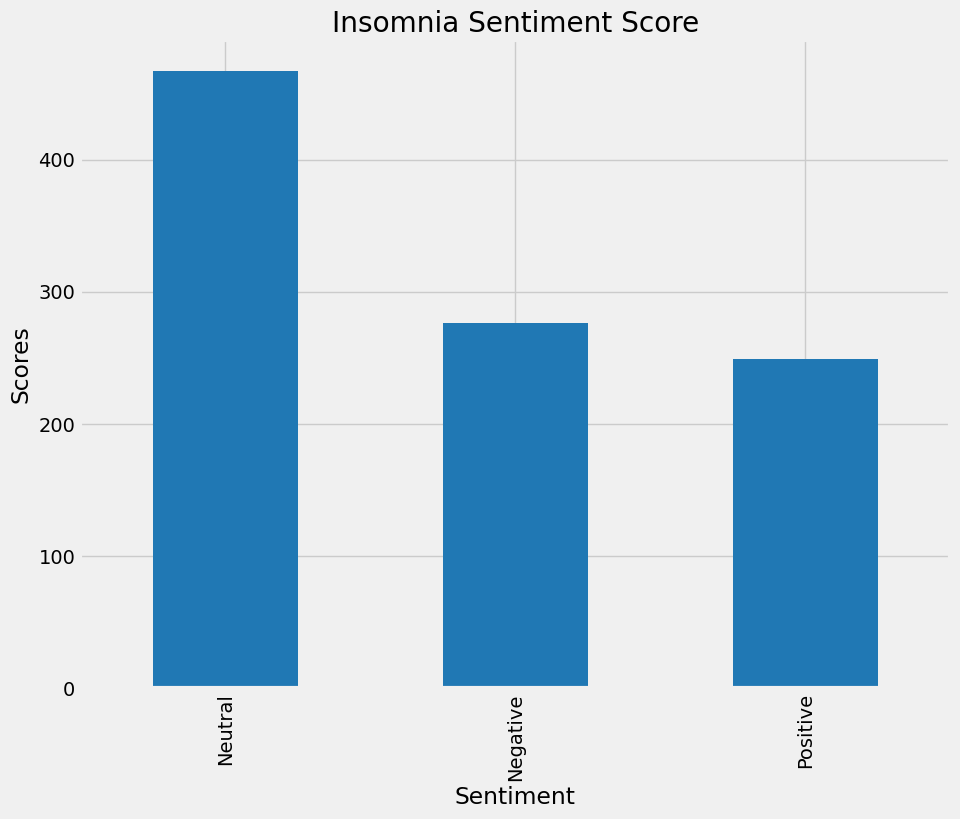

In [123]:
#Plot the values count of sentiment
plt.title('Insomnia Sentiment Score')
plt.xlabel('Sentiment')
plt.ylabel('Scores')
plt.rcParams['figure.figsize'] = (10,8)
insomnia_df['Insight'].value_counts().plot(kind='bar', color='#2078B4')
plt.show()

# wordcloud

:This shows the intensity of a word being spoken.






In [150]:
#stopword 라이브러리 이용해서 의미 없는 단어(불용어) 찾아내기
stopwords = STOPWORDS

print(stopwords)

{'with', "that's", 'why', 'myself', 'more', "how's", 'it', 'once', "he'd", 'who', 'am', 'during', 'can', 'she', 'is', 'all', 'yourselves', "i'm", 'them', 'as', 'however', "he's", 'what', 'since', 'ought', 'hers', 'otherwise', "i've", 'are', 'would', 'before', "aren't", "wouldn't", "where's", 'whom', 'how', 'nor', 'same', 'yourself', 'my', 'that', 'until', 'of', 'only', "here's", "who's", "you're", 'if', 'against', "isn't", 'have', 'does', "she'd", 'cannot', 'also', 'into', 'yours', 'should', 'no', "i'll", "won't", 'him', 'and', "hasn't", "we're", 'off', "shan't", 'here', "mustn't", "they're", 'ever', "let's", 'their', 'any', "what's", "he'll", 'get', 'these', 'between', "hadn't", 'theirs', "i'd", 'some', 'me', "she's", 'they', "you've", 'therefore', "doesn't", 'himself', 'most', 'being', "we'd", 'has', "she'll", 'http', "couldn't", 'herself', 'an', 'which', 'so', 'had', 'own', 'such', 'about', 'through', "weren't", "wasn't", 'hence', 'over', 'he', 'there', 'after', 'ours', 'for', 'doin

In [134]:
print(len(stopwords))

192


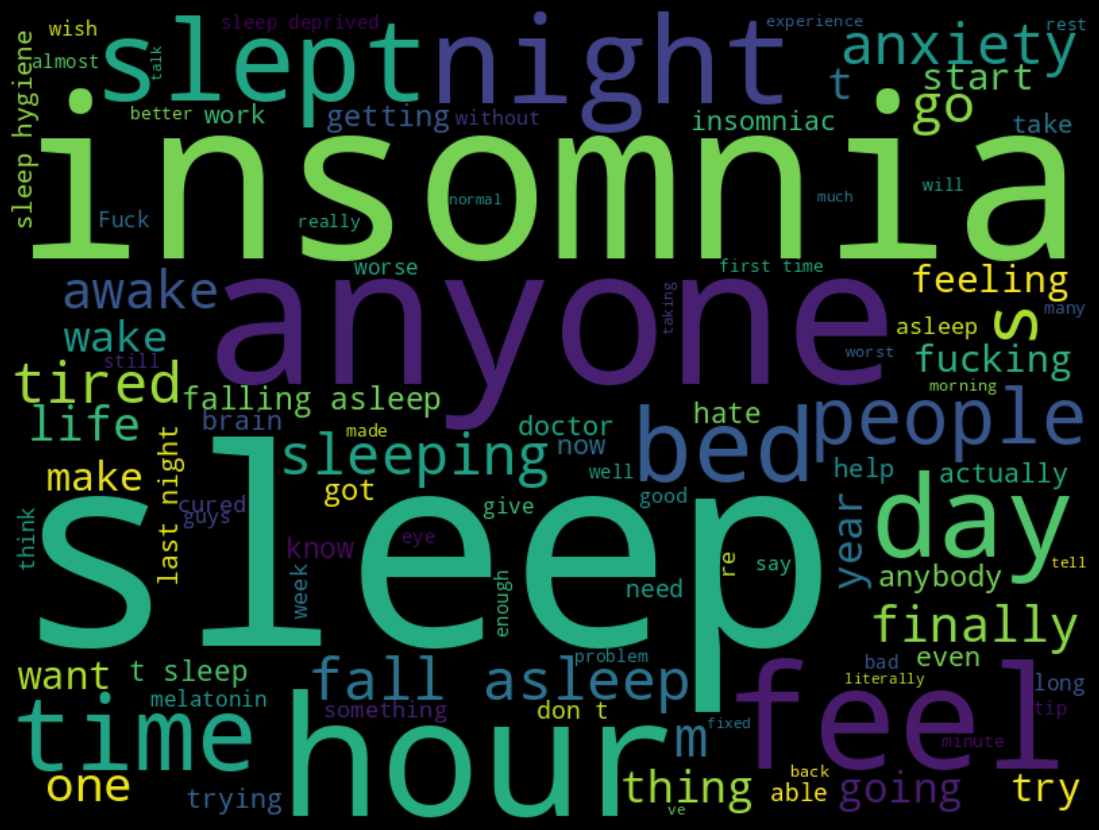

In [152]:
#모든 제목을 공백으로 구분된 한 줄의 문자열로 합침
text = ' '.join( [twts for twts in insomnia_df['Titles']] )

#워드클라우드 생성하기
wordcloud = WordCloud(width=800, height = 600, #워드클라우드의 크기 지정
 max_words = 100, #포함될 단어 수 지정
 stopwords = stopwords, #제외할 불용어
 background_color='black').generate(text)

# 이미지 디스플레이하기
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear') #픽셀의 색상 값 보정
plt.axis('off'); #축 끄기